In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polynomial_gossip as pg

# Generation of Figure 6

### Parameters

In [2]:
l = 40
n = l**2

methods = ["simple", "shift-register", ("message-passing",4), "local averaging"]

n_graphs = 1
T = 500

### Simulation

In [3]:
W = pg.build_2D_graph(n)

results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    initial_values = np.random.randn(n)
    results = pg.do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Figures

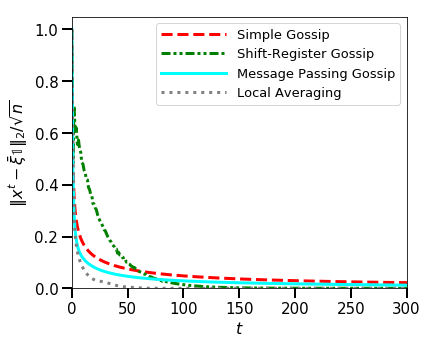

In [4]:
fig = pg.plot_curves(results_averaged, T, 
                  legend=True, logscale=False, 
                  xmin=0, xmax=300, ymin=0, ymax=1.05, 
                  figsize=(6,5))
plt.show()

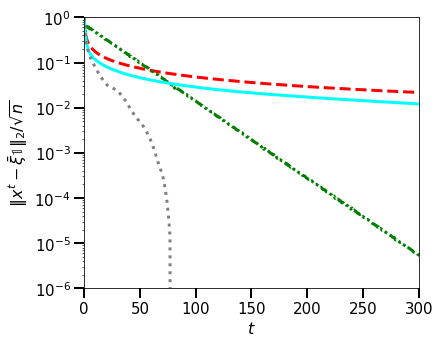

In [5]:
fig = pg.plot_curves(results_averaged, T, 
                  legend=False, logscale=True, 
                  xmin=0, xmax=300, ymin=10**(-6), ymax=1.05, 
                  figsize=(6,5))
plt.show()

# Generation of Figure 7

### Parameters

In [6]:
n = 2000
d=3

methods = ["simple", "shift-register", "local averaging", ("message-passing",d)]

n_graphs = 1
T = 500

### Simulation

In [8]:
results_averaged = {}
for method in methods:
    results_averaged[method] = np.zeros(T)
    
for graph in range(n_graphs):
    A = pg.adjacency_random_regular_graph(n,d)
    W = pg.csr_matrix(A/d)
    initial_values = np.random.randn(n)
    results = pg.do_the_gossip(methods,T,W,initial_values)
    for method in methods:
        results_averaged[method] += results[method]

for method in methods:
    results_averaged[method] /= n_graphs

### Figures

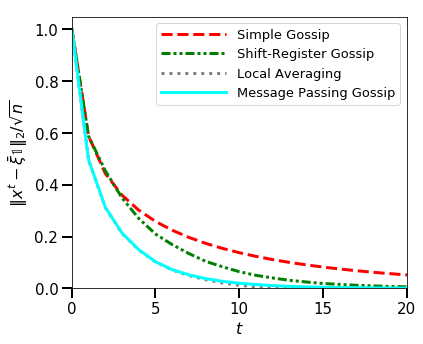

In [9]:
fig = pg.plot_curves(results_averaged, T, 
                  legend=True, logscale=False, 
                  xmin=0, xmax=20, ymin=0, ymax=1.05, 
                  figsize=(6,5))
plt.show()

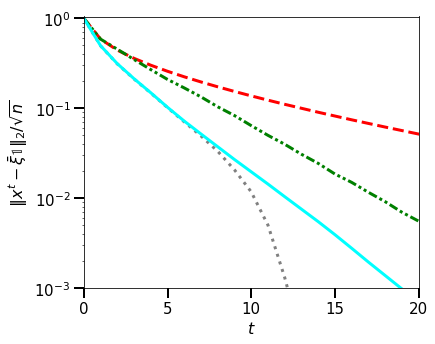

In [10]:
fig = pg.plot_curves(results_averaged, T, 
                  legend=False, logscale=True, 
                  xmin=0, xmax=20, ymin=10**(-3), ymax=1.05, 
                  figsize=(6,5))
plt.show()